<a href="https://colab.research.google.com/github/roshnimitra/Spam_email_detect/blob/main/Predict_email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

Get the dataset

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshnimitra","key":"ca8ac8991b59d97247162fa5e04ac759"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d venky73/spam-mails-dataset

Dataset URL: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
License(s): CC0-1.0
  0% 0.00/1.86M [00:00<?, ?B/s]
100% 1.86M/1.86M [00:00<00:00, 115MB/s]


In [6]:
from zipfile import ZipFile
file_name = 'spam-mails-dataset.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Now we can start with creating our model

In [7]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [23]:
df.shape

(5171, 3)

In [8]:
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.rename(columns={'label_num': 'spam'}, inplace=True)
df.head()

,label,text,spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text, df.spam, test_size=0.2)

In [11]:
len(X_train)

4136

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train_count = vec.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [5, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [14]:
X_test_count = vec.transform(X_test)
model.score(X_test_count, y_test)

0.9777777777777777

A better approach using pipeline

Using Multinomial Naive Bayes-

In [15]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [16]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Using Support Vector Machine-

In [29]:
from sklearn.svm import SVC
clf_svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('sv', SVC())
])

In [30]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('sv', SVC())])

Using Random Forrest classofier-

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [31]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

Model performance

In [17]:
# score of model using multinomialNB
clf.score(X_test, y_test)

0.9777777777777777

In [18]:
email = ['Hey mohan, can we get together to watch footbal game tomorrow?','Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']

In [19]:
clf.predict(email)

array([0, 1])

In [26]:
# score of model SVC
clf_svm.score(X_test, y_test)

0.9536231884057971

In [32]:
# score of model using Random forrest
clf_rf.score(X_test, y_test)

0.9748792270531401

Hence, best model is the one using multinomialNB.

We can also check the model performance using confusion matrix

In [20]:
y_predicted = clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[725,   9],
       [ 14, 287]])

Text(95.72222222222221, 0.5, 'Actual')

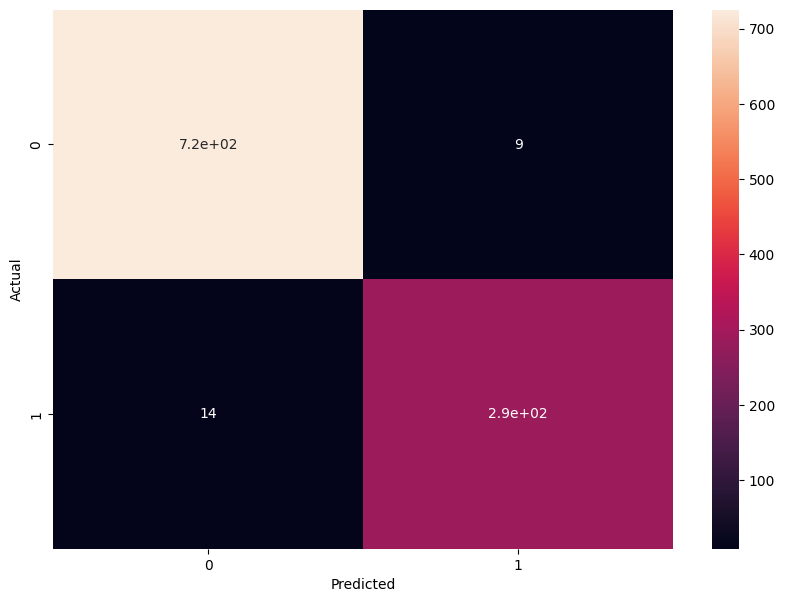

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')